# Homework 2023

In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('housing.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

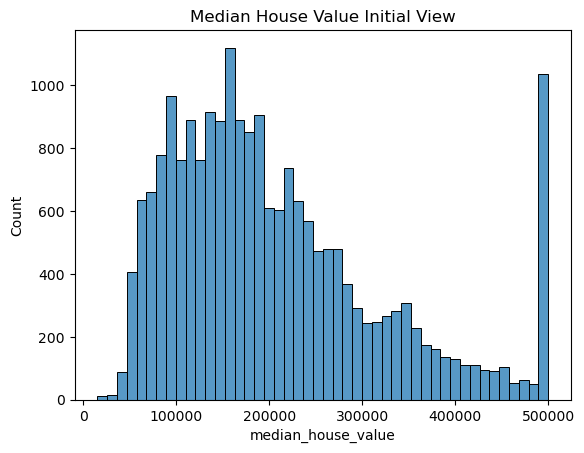

In [25]:
sns.histplot(df.median_house_value)
plt.title('Median House Value Initial View')
plt.show()

In [41]:
df_clean = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

del df_clean['ocean_proximity']

In [43]:
df_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [53]:
## Question 1

df_clean.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [55]:
## Question 2

df_clean['population'].median()

1195.0

In [67]:
## Prepare and split dataset

n = len(df_clean)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_test + n_val)


idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_test = df_clean.iloc[idx[:n_test]].copy()
df_val = df_clean.iloc[idx[n_test: n_test+n_val]].copy()
df_train = df_clean.iloc[idx[n_test+n_val:]].copy()


y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_train = np.log1p(df_train['median_house_value'].values)


del df_test['median_house_value']
del df_val['median_house_value']
del df_train['median_house_value']

In [69]:
def prepare_X_mean(df):
    df = df.copy()

    for col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

    return df


def prepare_X_0(df):
    df = df.copy()

    for col in df.columns:
        df[col] = df[col].fillna(0)

    return df

In [71]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [73]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)

In [79]:
## 0

X_train = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

0.35

In [81]:
## mean

X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

0.35